<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Dayana Navarro Valencia y Cristina Vazquez Vargas

**Fecha:** 17 de Marzo del 2020.

**Expediente** : if721470 if721215
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/DayanaNavarro/TAREA_8

# Tarea 8: Clase 14.ContinuacionReduccionVarianza

## Enunciado de tarea

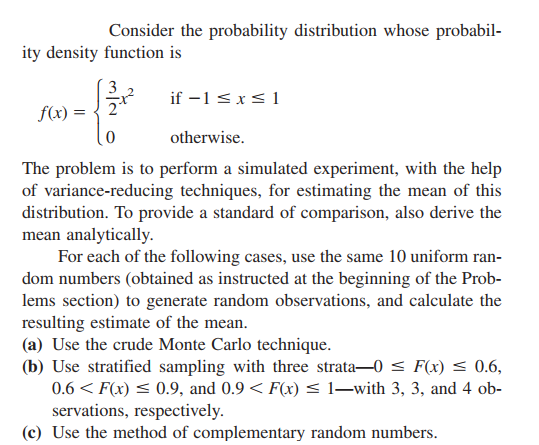 
Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.

## SOLUCION CRISTINA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle  # Librería para hacer ciclos
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd

In [2]:
# Código de solución estudiante 1
np.random.seed(514)
N = 10

def f_inv(u):
    'Función inversa'
    if u > 0.5:
        return (2*u-1)**(1/3)
    else:
        return -(-2*u+1)**(1/3)


### Método Montecarlo Crudo

In [3]:
np.random.seed(514)
#MonteCarlo crudo
u1 = np.random.rand(N)
m_crudo = np.mean(list(map(f_inv,u1)))
m_crudo

-0.2052634393130066

### Método con 3 estratos 

In [4]:
np.random.seed(514)
r1 = np.random.uniform(0,0.6,3)
r2 = np.random.uniform(0.6,0.9,3)
r3 = np.random.uniform(0.9,1,4)

r = [r1,r2,r3]

w = [1/2, 1, 4]

#Itero los 10 numeros aleatorios evaluados en la funcion
aleatorios = list(map(lambda i:(list(map(f_inv,i))),r))


#Itero con el método estratificado visto en clase
muestras = np.concatenate(list(map(lambda wi,xi:xi/wi,np.array(w),aleatorios)))
muestras.mean()

0.05715300967329623

### Método Números Aleatorios Complementarios

In [5]:
np.random.seed(514)
# 3. Método números complementarios
u2 = np.random.rand(int(N/2))
u2_c = 1 -u1
media_complementario = np.mean(list(map(f_inv, np.concatenate([u2, u2_c]))))
media_complementario

-0.005782504302440065

### Método Estratificado (B estratos)

In [6]:
#Estratificado
def estratificado(N:'Cantidad de Estratos'):
    B = N
    U = np.random.rand(N) #Distribucion entre 0 y 1
    i = np.arange(0, B)
    m_estratificado = (U + i) / B
    return m_estratificado

In [7]:
np.random.seed(514)

#llamo la función estratificada para generar U 
b = [2,4,6,10]
estrato_b = list(map(lambda y: estratificado(y),b))

#Itero sobre dos listas una que vaya evaluando la inversa en el vector y
#otra lista que jale cada vector generado con la función de estraificado en estrato_b
soluciones = list(map(lambda i:list(map(lambda m:f_inv(m),i)),estrato_b))

#Sacar el promedio de cada vector de soluciones
mean = list(map(lambda x: sum(x)/len(x),soluciones))

df = pd.DataFrame(index=b,columns=['Media'], dtype='float')
df.index.name = "Cantidad_terminos"
df.loc[b,"Media"] = mean
df

,Media
Cantidad_terminos,
2,0.090684
4,-0.153769
6,0.013990
10,-0.001236


In [8]:
resultados = pd.DataFrame(columns=['Montecarlo Crudo', '3 estratos diferente espaciado',
                                   'Aleatorios Complementarios','Con 2 estratos','Con 4 estratos',
                                  'Con 6 estratos','Con 10 estratos'], index=[1])
resultados['Montecarlo Crudo'] = m_crudo
resultados['3 estratos diferente espaciado'] = muestras.mean()
resultados['Aleatorios Complementarios'] = media_complementario
resultados['Con 2 estratos'] = mean[0]
resultados['Con 4 estratos'] = mean[1]
resultados['Con 6 estratos'] = mean[2]
resultados['Con 10 estratos'] = mean[3]


resultados

,Montecarlo Crudo,3 estratos diferente espaciado,Aleatorios Complementarios,Con 2 estratos,Con 4 estratos,Con 6 estratos,Con 10 estratos
1,-0.205263,0.057153,-0.005783,0.090684,-0.153769,0.01399,-0.001236


### Media Analítica

$$ \mathbb {E} [X]=\int_{-\infty }^{\infty } x f(x)dx $$

$$ {E} [X]=\int_{-1}^{1} \frac{3x^3}{2}dx  =  \frac{3x^4}{8} =  [\frac{3}{8} - \frac{3}{8}] = 0$$ 

$$ \mathbb {E} [X]=0 $$

#### Conclusiones
Al analizar la función dada, se que la media debería de ser cero por lo que el método que mejor se acerca a este valor es el Estratificado con 10 estratos igualmente espaciado.
Es claro que el método de Montecarlo crudo es la peor aproximación ya que se puede encontrar sesgado. En el método estratificado se puede generar una mejor aproximación del valor medio. 

## SOLUCION DAYANA

In [10]:
# Código de solución estudiante 2
np.random.seed(514)
N = 10

def f_inv(u):
    'Función inversa'
    if u > 0.5:
        return (2*u-1)**(1/3)
    else:
        return -(-2*u+1)**(1/3)
    

# MÉTODOS PARA APROXIMAR LA MEDIA DE LA DISTRIBUCIÓN 
# 1. Montecarlo crudo

u1 = np.random.rand(N)
media_montecarlo = np.mean(list(map(f_inv,u1)))


# 2. Método estratificado 

# Vectores de números aleatorios conforme al ejercicio


r1 = np.random.uniform(0,0.6,3)
r2 = np.random.uniform(0.6,0.9,3)
r3 = np.random.uniform(0.9,1,4)

r = [r1,r2,r3]

w = [1/2, 1, 4]

#Itero los 10 numeros aleatorios evaluados en la funcion
estratos = list(map(lambda i:(list(map(f_inv,i))),r))


#Itero con el método estratificado visto en clase
muestras = np.concatenate(list(map(lambda wi,xi:xi/wi,np.array(w),estratos)))
media_estratos= muestras.mean()


# 3. Método números complementarios

u2 = np.random.rand(int(N/2))
u2_c = 1 -u1
media_complementario = np.mean(list(map(f_inv, np.concatenate([u2, u2_c]))))


print('Media usando montecarlo estándar     =',media_montecarlo)
print('Error relativo método montecarlo estándar    = ',(1-media_montecarlo)*100)
print('Media usando números complementarios =',media_complementario)
print('Error relativo método numeros complementarios   = ',(1-media_complementario)*100)
print('La media muestral estimada método estratificado es = ',media_estratos)
print('Error relativo método estratificado    = ',(1-media_estratos)*100)


Media usando montecarlo estándar     = -0.2052634393130066
Error relativo método montecarlo estándar    =  120.52634393130066
Media usando números complementarios = 0.06261595404299952
Error relativo método numeros complementarios   =  93.73840459570005
La media muestral estimada método estratificado es =  -0.20518311545750656
Error relativo método estratificado    =  120.51831154575066


In [11]:
def estratificado(N:'Cantidad de Estratos'):
    B = N
    U = np.random.rand(N) #Distribucion entre 0 y 1
    i = np.arange(0, B)
    m_estratificado = (U + i) / B
    return m_estratificado

np.random.seed(514)
#llamo la función estratificada para generar U 
N = [2,4,6,10]
muestras = list(map(lambda y: estratificado(y),N))

#Itero sobre dos listas una que vaya evaluando la inversa en el vector y
#otra lista que jale cada vector generado con la función de estraificado en estrato_b
estra = list(map(lambda i:list(map(lambda m:f_inv(m),i)),muestras))

#Sacar el promedio de cada vector de soluciones
estratificado = list(map(lambda x: sum(x)/len(x),estra))

df = pd.DataFrame(index=N,columns=['Media'], dtype='float')
df.index.name = "Cantidad_terminos"
df.loc[N,"Media"] = estratificado
df

,Media
Cantidad_terminos,
2,0.090684
4,-0.153769
6,0.013990
10,-0.001236
